# Linear regression

Import all the modules you will need in this notebook here:

In [419]:
# exercise 0
# Put your solution here!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot

We continue analysing the `fram` heart disease data.

First load the data, use the name `fram` for the DataFrame variable. Make sure that in the data you loaded the column and row headers are in place. Checkout the summary of the variables using the `describe` method.

In [420]:
# exercise 1

def get_path(filename):
    import sys
    import os
    prog_name = sys.argv[0]
    if os.path.basename(prog_name) == "__main__.py":   # Running under TMC
        return os.path.join(os.path.dirname(prog_name), "..", "src", filename)
    else:
        return filename
    
fram = pd.read_csv(get_path('fram.txt'), sep='\t')


Create function `rescale` that takes a Series as parameter. It should center the data and normalize it by dividing
by 2$\sigma$, where $\sigma$ is the standard deviation. Return the rescaled Series.

In [421]:
# exercise 2
# Put your solution here!
def rescale(s):
    std = s.std()
    mean = s.mean()

    resc = (s - mean) / (2 * std)

    return resc


Add to the DataFrame the scaled versions of all the continuous variables (with function `rescale`). Add small letter `s` in front of the original variable name to get the name of the scaled variable. For instance, `AGE` -> `sAGE`.

In [422]:
# exercise 3
# Put your solution here!
for i in fram:
    if (fram[i].dtype == 'int64' or fram[i].dtype == 'float64') and i != 'ID':
        resc = rescale(fram[i])
        fram['s' + i] = resc


Form a model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables. Store the fitted model in variable named `fit`.

In [423]:
fit = smf.ols('sSBP ~ sFRW + SEX + sCHOL', data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   sSBP   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     66.37
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           4.13e-40
Time:                        13:34:20   Log-Likelihood:                -917.94
No. Observations:                1394   AIC:                             1844.
Df Residuals:                    1390   BIC:                             1865.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0345      0.018      1.964      

Add the variable AGE to the model and inspect the estimates of the coefficients using the `summary` method of the fitted model. Again use the name `fit` for the fitted model. (From now on assume that we always use the name `fit` for the variable of the fitted model.)

In [424]:
# exercise 5
fit = smf.ols('sSBP ~ sFRW + SEX + sCHOL + sAGE', data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   sSBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     59.39
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           2.44e-46
Time:                        13:34:20   Log-Likelihood:                -901.20
No. Observations:                1394   AIC:                             1812.
Df Residuals:                    1389   BIC:                             1839.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0372      0.017      2.140      

How much does the inclusion of age increase the explanatory power of the model? Which variables explain the variance of the target variable most?

***

To see how much the inclusion of AGE increases the power of the model, we need to examine the R-squared and Adjusted R-squared values. Without the AGE variable, R² was 0.125 and Adjusted R² was 0.123, meaning the model explained about 12% of the variance. After adding AGE, R² increased to 0.146 and Adjusted R² to 0.144, which is around 14%. The change of about 2.1 percentage points may seem small, but it is statistically meaningful and adds explanatory power to the model.
To determine which variables explain most of the variance in the target variable, we look at the coefficient estimates. FRW (weight) has the largest impact, with a coefficient of 0.3029. This means that if weight increases by one unit (remember that the variables are rescaled, so one unit does not mean one kilogram), the SBP increases by 0.3029 units (also rescaled). We should also consider the t-values and p-values: a large absolute t-value and a small p-value indicate that the effect is statistically significant and unlikely to be due to chance.

***

Try to add to the model all the interactions with other variables. 

In [425]:
# exercise 6
# Put your solution here!
fit = smf.ols('sSBP ~ sFRW + SEX + sCHOL + sAGE + sFRW:SEX + sFRW:sCHOL + sFRW:sAGE + SEX:sCHOL + SEX:sAGE + sCHOL:sAGE', data=fram).fit()

print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   sSBP   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     24.52
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           4.92e-43
Time:                        13:34:20   Log-Likelihood:                -897.49
No. Observations:                1394   AIC:                             1817.
Df Residuals:                    1383   BIC:                             1875.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0439      0.01

Then visualize the model as the function of weight for the youngest (sAGE=-1.0), middle aged (sAGE=0.0), and oldest (sAGE=1.0) women while assuming the background variables to be centered. Remember to consider the changes in the intercept and in the regression coefficient caused by age. Visualize both the data points and the fitted lines.

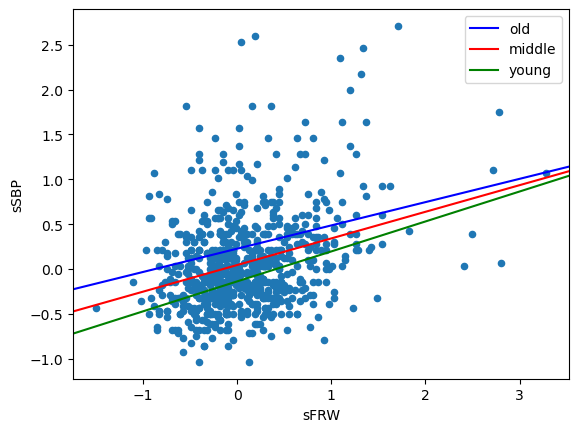

In [426]:
# exercise 7
# Put your solution here!
p = fit.params

fram[fram.SEX=='female'].plot.scatter('sFRW', 'sSBP')
abline_plot(intercept = p.Intercept + p['sAGE']*1, slope=p.sFRW + p['sFRW:sAGE']*1, ax = plt.gca(), color = 'blue', label = 'old')
abline_plot(intercept = p.Intercept + p['sAGE']*0, slope=p.sFRW, ax = plt.gca(), color = 'red', label = 'middle')
abline_plot(intercept = p.Intercept + p['sAGE']*-1, slope=p.sFRW + p['sFRW:sAGE']*-1, ax = plt.gca(), color = 'green', label = 'young')
plt.legend()

How does the dependence of blood pressure on weight change as a person gets older?
***

From the graph, we can see that the starting point of SBP is lower the younger the woman is, but with weight gain, SBP increases faster for younger women. I was a little surprised at first, thinking there might be a mistake in my code, but after checking, I confirmed that the graph is correct. Research also shows that weight gain matters more for younger women. This happens because the second most important variable explaining the growth of SBP is age. As women get older, SBP grows faster and approaches its maximum, so weight has less influence.

Answer: The dependence of blood pressure on weight weakens as women get older.

***

### Even more accurate model

Include the background variable `sCIG` from the data and its interactions. Visualize the model for systolic blood pressure as the function of the most important explanatory variable. Visualize separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

                            OLS Regression Results                            
Dep. Variable:                   sSBP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     16.50
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           2.99e-40
Time:                        13:34:20   Log-Likelihood:                -896.12
No. Observations:                1394   AIC:                             1824.
Df Residuals:                    1378   BIC:                             1908.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0577      0.02

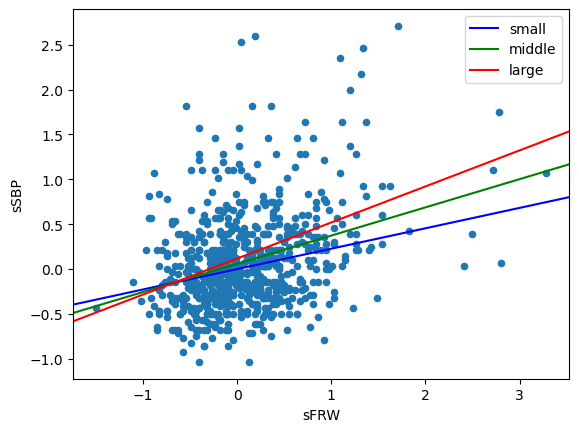

In [427]:
# exercise 8
# Put your solution here!
fit = smf.ols('sSBP ~ sFRW + SEX + sCHOL + sAGE + sCIG + sFRW:SEX + sFRW:sCHOL + sFRW:sAGE + SEX:sCHOL + SEX:sAGE + sCHOL:sAGE + sFRW:sCIG + SEX:sCIG + sCHOL:sCIG + sAGE:sCIG', data=fram).fit()

p = fit.params

fram[fram.SEX=='female'].plot.scatter('sFRW', 'sSBP')
abline_plot(intercept = p.Intercept + p['sCHOL']*-1 + p['SEX[T.male]']*0 + p['sAGE']* fram['sAGE'].mean() + p['sCIG']*fram['sCIG'].mean(), slope=p['sFRW']+ p['sFRW:sCHOL']*-1 + p['sFRW:sAGE']*fram['sAGE'].mean()  + p['sFRW:sCIG']*fram['sCIG'].mean(), ax = plt.gca(), color = 'blue', label = 'small')
abline_plot(intercept = p.Intercept + p['sCHOL']*0 + p['SEX[T.male]']*0 + p['sAGE']* fram['sAGE'].mean() + p['sCIG']*fram['sCIG'].mean(), slope=p['sFRW']+ p['sFRW:sCHOL']*0 + p['sFRW:sAGE']*fram['sAGE'].mean()  + p['sFRW:sCIG']*fram['sCIG'].mean(), ax = plt.gca(), color = 'green', label = 'middle')
abline_plot(intercept = p.Intercept + p['sCHOL']*1 + p['SEX[T.male]']*0 + p['sAGE']* fram['sAGE'].mean() + p['sCIG']*fram['sCIG'].mean(), slope=p['sFRW']+ p['sFRW:sCHOL']*1 + p['sFRW:sAGE']*fram['sAGE'].mean()  + p['sFRW:sCIG']*fram['sCIG'].mean(), ax = plt.gca(), color = 'red', label = 'large')

plt.legend()
print(fit.summary())

How does the model and its accuracy look?

***

To assess the accuracy of the model, we need to examine the R-squared and Adjusted R-squared values. Compared to the previous model, we can see that R² increased by 0.001, while Adjusted R² decreased by 0.001. This suggests that the new model did not improve upon the previous version.
Additionally, the visual interpretation of the model is somewhat unclear. I couldn't find a convincing reason why women with lower cholesterol and body weight would have higher systolic blood pressure (SBP). At a certain weight threshold, the situation seems to reverse.
After that point, the model behaves more logically: it suggests that for women with higher cholesterol, SBP increases more steeply with weight than for women with low or average cholesterol levels.


***

# Logistic regression

In [428]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

We will continue predicting high blood pressure by taking in some continuous background variables, such as the age.

Recreate the model `HIGH_BP ~ sFRW + SEX + SEX:sFRW` presented in the introduction. Make sure, that you get the same results. Use name `fit` for the fitted model. Compute and store the error rate into variable `error_rate_orig`.

In [429]:
# exercise 9
# Put your solution here!
fram["HIGH_BP"] = (fram.SBP >= 140) | (fram.DBP >= 90)
fram.HIGH_BP = fram.HIGH_BP.map(int)
fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW", data=fram,family=sm.families.Binomial()).fit()

error_rate_orig = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))

print(fit.summary())
print(error_rate_orig)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                HIGH_BP   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1390
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -856.87
Date:                Tue, 19 Aug 2025   Deviance:                       1713.7
Time:                        13:34:20   Pearson chi2:                 1.39e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06351
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7631      0.082  

Add the `sAGE` variable and its interactions. Check the prediction accuracy of the model and compare it to the previous model. Store the prediction accuracy to variable `error_rate`.

In [430]:
# exercise 10
# Put your solution here!
fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + SEX:sAGE + sFRW:sAGE", data=fram,family=sm.families.Binomial()).fit()
error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))

print(fit.summary())
print(error_rate)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                HIGH_BP   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1387
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -845.51
Date:                Tue, 19 Aug 2025   Deviance:                       1691.0
Time:                        13:34:20   Pearson chi2:                 1.39e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.07865
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.8079      0.084  

Visualize the predicted probability of high blood pressure as the function of weight. Remember to use normalized values (`rescale`) also for those variables that are not included in the visualization, so that sensible values are used for them (data average). Draw two figures with altogether six curves: young, middle aged, and old women; and young, middle aged, and old men. Use `plt.subplots`. (Plotting works in similar fashion as in the introduction. The argument factors need, however, be changed as in the example about visualisation of continuous variable.) 

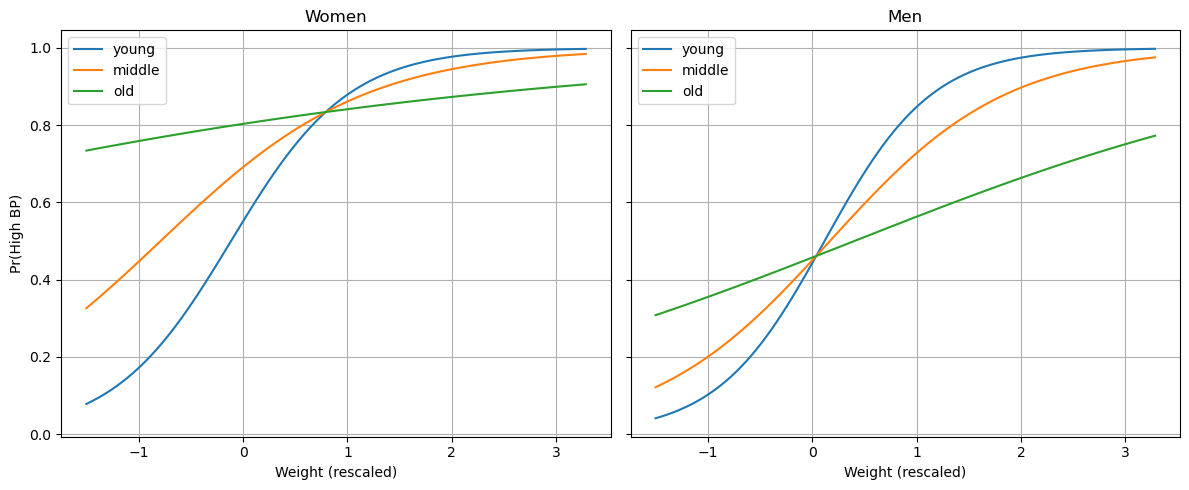

In [431]:
# exercise 11

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))


X = np.linspace(fram.sFRW.min(), fram.sFRW.max(), 100)
p = fit.params

age_groups = {
    "young": -1,
    "middle": 0,
    "old": 1
}

fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

for label, age in age_groups.items():
    w = (p.Intercept + p.sFRW * X + p.sAGE * age + p['sFRW:sAGE'] * X * age)
    axes[0].plot(X, logistic(w), label = label)


axes[0].set_title("Women")
axes[0].set_xlabel("Weight (rescaled)")
axes[0].set_ylabel("Pr(High BP)")
axes[0].legend()
axes[0].grid()


for label, age in age_groups.items():
    m = (p.Intercept * X + p['SEX[T.male]']+ p['SEX[T.male]:sFRW'] * X + p.sAGE * age +p['SEX[T.male]:sAGE'] * age+ + p['sFRW:sAGE'] * X * age)
    axes[1].plot(X, logistic(m), label = label) 

axes[1].set_title("Men")
axes[1].set_xlabel("Weight (rescaled)")
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()


How do the models with different ages and genders differ from each other?

***
From my model, we can see that for young people, the graphs look similar and resemble the shape of an e^xfunction. For men, the increase in predicted probability of high blood pressure with weight is slightly faster (steeper slope). When we look at older women and men, the differences become more pronounced. While the young men’s and women’s graphs start from the same point, for older individuals, the middle-aged women’s graph starts at the same point as older men’s, indicating that age has a stronger effect for women than for men.

The middle-aged men’s graph still resembles the e^x function like the youngest ones but grows more slowly. The middle-aged women’s graph increases faster from weight values 0 to 0.75 but levels off afterward. For older men, the graph is almost linear, meaning that the risk of high blood pressure grows at a constant rate with weight. Additionally, there is a larger difference in starting points between middle-aged and older men than between young and middle-aged men. Interestingly, after zero on the normalized age scale, the predicted risk for older men slows down, and at the maximum weight point (around 3), it is about 20% lower than for young men.

The oldest women’s graph grows more slowly than those of all other age groups, which confirms previous observations from the model that older women’s systolic blood pressure is less dependent on weight than that of younger women. Similarly to men, older women have a lower risk of high blood pressure than young or middle-aged women after weight values above approximately 0.8.

Summary (compact):
The effect of increasing weight on high blood pressure decreases with age. In men, the oldest individuals have a much lower risk compared to younger men as weight increases. Comparing genders, age has a stronger effect for women, as seen in the higher starting points of their graphs.
***

Create here a helper function `train_test_split` that gets a DataFrame as parameter and return a pair of DataFrames: one for training and the second for testing. 
The function should get parameters in the following way:
```python
train_test_split(df, train_fraction=0.8)
```
The data should be split randomly to training and testing DataFrames so that `train_fraction` fraction of data should go into the training set. Use the `sample` method of the DataFrame.

In [432]:
# exercise 12
# Put your solution here!
def train_test_split(df, train_fraction):
    train = fram.sample(frac = train_fraction)
    test = fram.drop(train.index)

    return train, test


Check the prediction accuracy of your model using cross validation. Use 100-fold cross validation and training_fraction 0.8.

In [433]:
# exercise 13
np.random.seed(1)
# Put your solution here!

accuracy = []

for i in range(100):
    train, test = train_test_split(fram, train_fraction=0.8)
    fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + SEX:sAGE + sFRW:sAGE", data=train,family=sm.families.Binomial()).fit()

    pred = fit.predict(test)
    pred = (pred > 0.5).astype(int)

    accuracy.append(np.mean(pred == test['HIGH_BP'].astype(int)))

print(np.mean(accuracy))

0.6688172043010754


## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, compute the mean of this variable, which tells the number of positive cases.

In [434]:
# exercise 14
# Put your solution here!

fram['hasCHD'] = (fram.CHD > 0).map(int)

#print(np.mean(fram.hasCHD.head()))

Next, form a logistic regression model for variable `hasCHD` by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Store the fitted model to variable `fit`. Compute the prediction accuracy of the model, store it to variable `error_rate`.

In [435]:
# exercise 15
# Put your solution here!

fit = smf.glm(formula='hasCHD ~ sCHOL + sCIG + sFRW + sCHOL:sCIG + sCHOL:sFRW + sCIG:sFRW', data=fram, family = sm.families.Binomial()).fit()
error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.hasCHD) | ((fit.fittedvalues > 0.5) & ~fram.hasCHD))

print(fit.summary())
#print(error_rate)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 hasCHD   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1387
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -721.19
Date:                Tue, 19 Aug 2025   Deviance:                       1442.4
Time:                        13:34:21   Pearson chi2:                 1.39e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01950
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2888      0.067    -19.101      0.0

Visualize the model by using the most important explanator on the x axis. Visualize both the points (with `plt.scatter`)
and the logistic curve (with `plt.plot`).

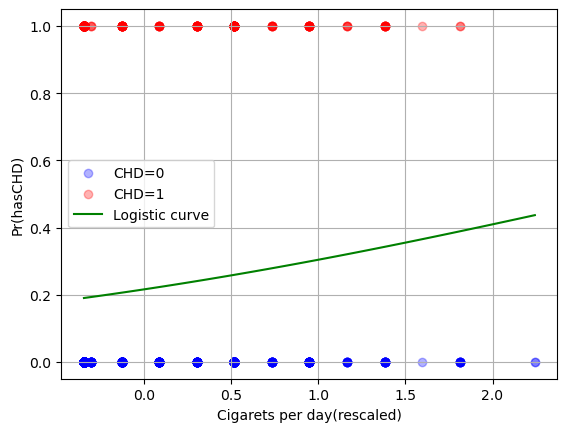

In [436]:
# exercise 16
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))
# Put your solution here!

X = np.linspace(fram.sCIG.min(), fram.sCIG.max(), 100)
p = fit.params

mean_chol = fram.sCHOL.mean()
mean_frw = fram.sFRW.mean()

g = (p.Intercept + p.sCIG * X + p.sCHOL * mean_chol + p.sFRW * mean_frw + p['sCHOL:sCIG'] * mean_chol * X + p['sCHOL:sFRW'] * mean_chol * mean_frw + p['sCIG:sFRW'] * X * mean_frw)

plt.scatter(fram.sCIG[fram.hasCHD==0], fram.hasCHD[fram.hasCHD==0],  color="blue", alpha=0.3, label="CHD=0")
plt.scatter(fram.sCIG[fram.hasCHD==1], fram.hasCHD[fram.hasCHD==1], color="red", alpha=0.3, label="CHD=1")
plt.plot(X, logistic(g), color="green", label="Logistic curve")
plt.ylabel('Pr(hasCHD)')
plt.xlabel('Cigarets per day(rescaled)')
plt.grid()
plt.legend()
plt.show()




Is the prediction accuracy of the model good or bad? Can we expect to have practical use of the model?
***
From the summary, we can see that the model’s pseudo R-squared is 0.0195, which is very low. The most important explanatory variable is the number of cigarettes smoked per day, with a coefficient of 0.46. In second place is the individual’s weight, with a coefficient of 0.44, very close to the first, and cholesterol comes third with a coefficient of 0.33. Based on this, we can conclude that the model is quite weak, although it does explain CHD to some extent. In my opinion, the model is not yet suitable for practical use.
***

If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal hear disease? Note that the model expects normalized values. Store the normalized values to dictionary called `point`. Store the probability in variable `predicted`.

In [437]:
# exercise 17
# Put your solution here!

def rescale_v(v, c):
    std = c.std()
    mean = c.mean()

    resc = (v - mean) / (2 * std)

    return resc

point = {'sCHOL': rescale_v(200, fram['CHOL']), 'sCIG': rescale_v(17, fram['CIG']), 'sFRW' : rescale_v(100, fram['FRW'])}

z = (fit.params.Intercept + fit.params.sCHOL * point['sCHOL'] + fit.params.sCIG * point['sCIG'] + fit.params.sFRW * point['sFRW'] + fit.params['sCHOL:sCIG'] * point['sCHOL'] * point['sCIG'] + fit.params['sCHOL:sFRW'] * point['sCHOL'] * point['sFRW'] + fit.params['sCIG:sFRW'] * point['sCIG'] * point['sFRW'])

predicted = logistic(z)
print(predicted)

#answer person with cholesterol 200, cig 17 and weight 100 has a probability of 22%

0.21616166025040984
